In [13]:
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
import experimenter
import pandas as pd 
import matplotlib.pyplot as plt 

sns.set_theme()

In [14]:
# Maximum number of replicas that the system can manage.
MAX_REPLICA_COUNT = 100

# Number of experiments
NUMBER_OF_EXPERIMENTS = 5

# Each experiment will be done by this many times for consistency.
EXPERIMENT_PROOF = 5 # REPITITION

# Int array of replicas for each experiment
REPLICAS: np.ndarray = experimenter.calculate_number_of_replicas(MAX_REPLICA_COUNT, NUMBER_OF_EXPERIMENTS)

# How much should we wait for the kubernetes api to be stabilized
COOLDOWNS: np.ndarray = 2 * np.ones((NUMBER_OF_EXPERIMENTS,), dtype=int) + (REPLICAS * 0.004).astype(int) # Make it ~3 mins

# Namespace of the experimentation
NAMESPACE = "experiments"

# Driver used in kubectl
DRIVER = "minikube" # minikube, kwok, native

# Framework
FRAMEWORK = "native" # native, edgenet (Nisan ortasi) | liqo, kubefed (Sonradan)
# EdgeNet scalability test, how many compute cluster can be tested...

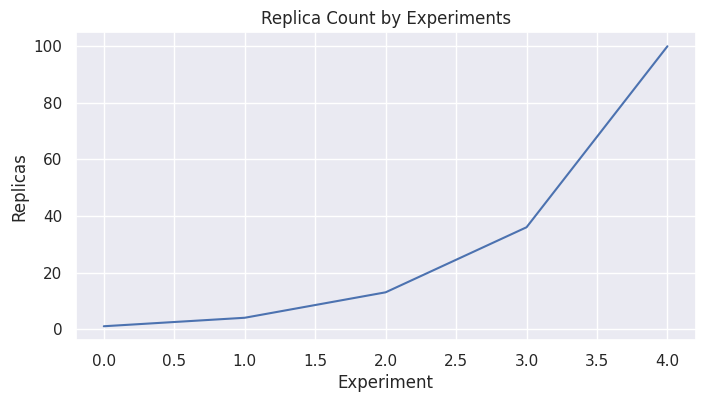

[2 2 2 2 2]
[  1   4  13  36 100]


In [15]:
def draw_replicas(replicas=REPLICAS):
    plt.figure(figsize=(8, 4))
    plt.plot(range(len(replicas)), replicas)
    plt.title("Replica Count by Experiments")
    plt.xlabel("Experiment")
    plt.ylabel("Replicas")
    plt.show()

draw_replicas()
print(COOLDOWNS)
print(REPLICAS)

In [16]:
# Do the experiment
# experimenter.experiment_with(FRAMEWORK, DRIVER, 1, [1, 1], [1, 1])
experimenter.experiment_with(FRAMEWORK, DRIVER, EXPERIMENT_PROOF, REPLICAS.tolist(), COOLDOWNS.tolist())

Estimated time 126 second(s) will be saved in './exps/20230228_011357.feather'.
Experiment of 5 step(s) with 1 replica(s) in 'native' and 'busybox' image in namespace 'experiments'. Estimated time for the experiment: 10 second(s)
Experiment of 5 step(s) with 4 replica(s) in 'native' and 'busybox' image in namespace 'experiments'. Estimated time for the experiment: 12 second(s)
Experiment of 5 step(s) with 13 replica(s) in 'native' and 'busybox' image in namespace 'experiments'. Estimated time for the experiment: 16 second(s)
Experiment of 5 step(s) with 36 replica(s) in 'native' and 'busybox' image in namespace 'experiments'. Estimated time for the experiment: 28 second(s)
Experiment of 5 step(s) with 100 replica(s) in 'native' and 'busybox' image in namespace 'experiments'. Estimated time for the experiment: 60 second(s)
Done!


In [17]:
KNATIVE_EXPERIMENT_NAME = "exps/20230228_011357.feather"

def process_experiment(filename):
    data_df = pd.read_feather(filename)

    data_df["api_server_creation_delta"] = data_df["event_created_at"] - data_df["before_create_timestamp"]
    data_df["api_server_deletion_delta"] = data_df["event_deleted_at"] - data_df["before_delete_timestamp"]
    
    data_df.to_feather(filename)
    return data_df

knative_minikube_df = process_experiment(KNATIVE_EXPERIMENT_NAME)
knative_minikube_df

,before_create_timestamp,before_firstwait_timestamp,before_delete_timestamp,before_secondwait_timestamp,before_cooldown_timestamp,before_join_timestamp,replicas,framework,error_occured,errors_rised,...,total_steps,cool_period,driver,command,event_created_at,event_deleted_at,event_modified_at,event_replicas_at,api_server_creation_delta,api_server_deletion_delta
0,2023-02-28 01:13:57.775259,2023-02-28 01:13:57.833597,2023-02-28 01:14:02.190508,2023-02-28 01:14:02.237935,2023-02-28 01:14:02.237943,2023-02-28 01:14:04.238065,1,native,False,"[None, None, None]",...,5,2,minikube,"[/bin/sh, -c, sleep 9999]",2023-02-28 01:13:57.826074,2023-02-28 01:14:02.239578,"[2023-02-28 01:13:57.858614, 2023-02-28 01:13:...","[nan, nan, nan, 1.0]",0 days 00:00:00.050815,0 days 00:00:00.049070
1,2023-02-28 01:14:04.740118,2023-02-28 01:14:04.775220,2023-02-28 01:14:08.636037,2023-02-28 01:14:08.676581,2023-02-28 01:14:08.676588,2023-02-28 01:14:10.676722,1,native,False,"[None, None, None]",...,5,2,minikube,"[/bin/sh, -c, sleep 9999]",2023-02-28 01:14:04.771007,2023-02-28 01:14:08.674290,"[2023-02-28 01:14:04.793101, 2023-02-28 01:14:...","[nan, nan, nan, 1.0]",0 days 00:00:00.030889,0 days 00:00:00.038253
2,2023-02-28 01:14:11.179050,2023-02-28 01:14:11.222876,2023-02-28 01:14:15.756957,2023-02-28 01:14:15.802825,2023-02-28 01:14:15.802834,2023-02-28 01:14:17.802978,1,native,False,"[None, None, None]",...,5,2,minikube,"[/bin/sh, -c, sleep 9999]",2023-02-28 01:14:11.216859,2023-02-28 01:14:15.802387,"[2023-02-28 01:14:11.239966, 2023-02-28 01:14:...","[nan, nan, nan, 1.0]",0 days 00:00:00.037809,0 days 00:00:00.045430
3,2023-02-28 01:14:18.306833,2023-02-28 01:14:18.350028,2023-02-28 01:14:22.139557,2023-02-28 01:14:22.177871,2023-02-28 01:14:22.177875,2023-02-28 01:14:24.177949,1,native,False,"[None, None, None]",...,5,2,minikube,"[/bin/sh, -c, sleep 9999]",2023-02-28 01:14:18.345612,2023-02-28 01:14:22.177650,"[2023-02-28 01:14:18.371883, 2023-02-28 01:14:...","[nan, nan, nan, 1.0]",0 days 00:00:00.038779,0 days 00:00:00.038093
4,2023-02-28 01:14:24.679267,2023-02-28 01:14:24.703229,2023-02-28 01:14:28.465174,2023-02-28 01:14:28.503443,2023-02-28 01:14:28.503450,2023-02-28 01:14:30.503527,1,native,False,"[None, None, None]",...,5,2,minikube,"[/bin/sh, -c, sleep 9999]",2023-02-28 01:14:24.700578,2023-02-28 01:14:28.506132,"[2023-02-28 01:14:24.716916, 2023-02-28 01:14:...","[nan, nan, nan, 1.0]",0 days 00:00:00.021311,0 days 00:00:00.040958
5,2023-02-28 01:14:31.030690,2023-02-28 01:14:31.060010,2023-02-28 01:14:38.797834,2023-02-28 01:14:38.843242,2023-02-28 01:14:38.843248,2023-02-28 01:14:40.843334,4,native,False,"[None, None, None]",...,5,2,minikube,"[/bin/sh, -c, sleep 9999]",2023-02-28 01:14:31.055691,2023-02-28 01:14:38.842867,"[2023-02-28 01:14:31.074718, 2023-02-28 01:14:...","[nan, nan, nan, 1.0, 2.0, 3.0, 4.0]",0 days 00:00:00.025001,0 days 00:00:00.045033
6,2023-02-28 01:14:41.346355,2023-02-28 01:14:41.386986,2023-02-28 01:14:50.247656,2023-02-28 01:14:50.287081,2023-02-28 01:14:50.287087,2023-02-28 01:14:52.287174,4,native,False,"[None, None, None]",...,5,2,minikube,"[/bin/sh, -c, sleep 9999]",2023-02-28 01:14:41.382596,2023-02-28 01:14:50.290236,"[2023-02-28 01:14:41.413470, 2023-02-28 01:14:...","[nan, nan, nan, 1.0, 2.0, 3.0, 4.0]",0 days 00:00:00.036241,0 days 00:00:00.042580
7,2023-02-28 01:14:52.789496,2023-02-28 01:14:52.819477,2023-02-28 01:15:03.142116,2023-02-28 01:15:03.169245,2023-02-28 01:15:03.169249,2023-02-28 01:15:05.169323,4,native,False,"[None, None, None]",...,5,2,minikube,"[/bin/sh, -c, sleep 9999]",2023-02-28 01:14:52.815223,2023-02-28 01:15:03.169911,"[2023-02-28 01:14:52.843468, 2023-02-28 01:14:...","[nan, nan, nan, 1.0, 2.0, 3.0, 4.0]",0 days 00:00:00.025727,0 days 00:00:00.027795
8,2023-02-28 01:15:05.670289,2023-02-28 01:15:05.705737,2023-02-28 01:15:14.959813,2023-02-28 01:15:14.996695,2023-02-28 01:15:14.996700,2023-02-28 01:15:16.996825,4,native,False,"[None, None, None]",...,5,2,minikube,"[/bin/sh, -c, 

In [18]:
# knative_minikube_df.to_feather("./saved_experiments/native_minikube_20230228_011357.feather")

In [ ]:
# BETTER PROCESS THIS DATA
plt.figure(figsize=(20, 4))
plt.subplot(1, 2, 1)
plt.plot(knative_minikube_df["api_server_deletion_delta"]); plt.title("Creation Times")
plt.subplot(1, 2, 2)
plt.plot(knative_minikube_df["api_server_creation_delta"]); plt.title("Deletion Times")
plt.show()